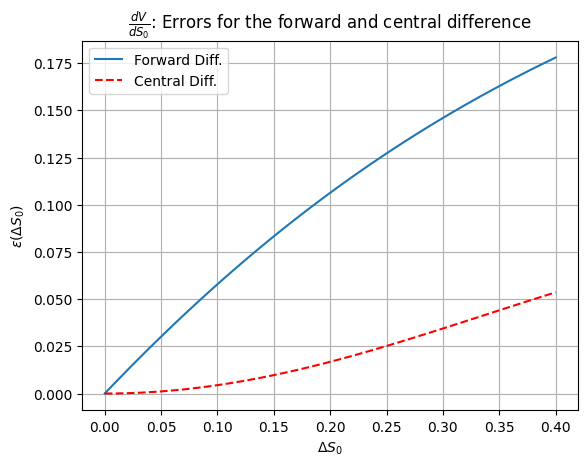

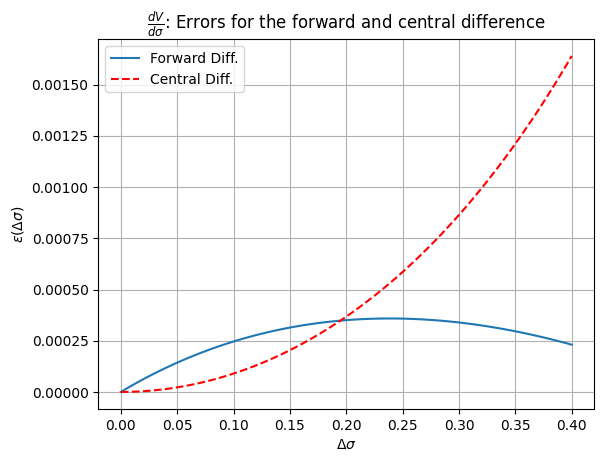

In [7]:
#%%
"""
Created on Thu Dec 12 2018
Forward difference and central difference error analysis
@author: Lech A. Grzelak
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum 

# This class defines puts and calls

class OptionType(enum.Enum):
    CALL = 1.0
    PUT = -1.0

# Black-Scholes call option price

def BS_Call_Put_Option_Price(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) 
    * (T-t)) / (sigma * np.sqrt(T-t))
    d2    = d1 - sigma * np.sqrt(T-t)
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * (T-t))
    elif CP == OptionType.PUT:
        value = st.norm.cdf(-d2) * K * np.exp(-r * (T-t)) - st.norm.cdf(-d1)*S_0
    return value

def BS_Delta(CP,S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    if CP == OptionType.CALL:
        value = st.norm.cdf(d1)
    elif CP == OptionType.PUT:
       value = st.norm.cdf(d1)-1
    return value

def BS_Gamma(S_0,K,sigma,t,T,r):
    K = np.array(K).reshape([len(K),1])
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    return st.norm.pdf(d1) / (S_0 * sigma * np.sqrt(T-t))

def BS_Vega(S_0,K,sigma,t,T,r):
    d1    = (np.log(S_0 / K) + (r + 0.5 * np.power(sigma,2.0)) * \
             (T-t)) / (sigma * np.sqrt(T-t))
    return S_0*st.norm.pdf(d1)*np.sqrt(T-t)


def mainCalculation():
    CP        = OptionType.CALL
    S0        = 1
    r         = 0.06
    sigma     = 0.3
    T         = 1
    K         = np.array([S0])
    t         = 0.0

    # Range of shocks 

    dxV = np.linspace(0.00001,0.4,100);

    error_frwdDiff_DELTA  = np.zeros([len(dxV),1])
    error_frwdDiff_VEGA   = np.zeros([len(dxV),1])
    error_centDiff_DELTA  = np.zeros([len(dxV),1])
    error_centDiff_VEGA   = np.zeros([len(dxV),1])

    exactDelta = BS_Delta(CP,S0,K,sigma,t,T,r)
    exactVega  = BS_Vega(S0,K,sigma,t,T,r)
    bsPrice    = lambda S0,sigma: BS_Call_Put_Option_Price(CP,S0,K,sigma,t,T,r)

    
    for idx in range(0,len(dxV)):
        dx = dxV[idx]
    
        # Shocks will be proportional to the parameter

        dS0 =dx *S0
        dsigma =dx *sigma
    
        # Delta estimation, i.e. dV/dS0

        frwdDiffDelta    = (bsPrice(S0+dS0,sigma) - bsPrice(S0,sigma))/dS0
        centralDiffDelta = (bsPrice(S0+dS0,sigma) - bsPrice(S0-dS0,sigma))/(2*dS0)
        error_frwdDiff_DELTA[idx] = abs(exactDelta - frwdDiffDelta)
        error_centDiff_DELTA[idx] = abs(exactDelta - centralDiffDelta)
        
        # Vega estimation, i.e. dV/dsigma

        frwdDiffVega    = (bsPrice(S0,sigma+dsigma) - bsPrice(S0,sigma))/dsigma
        centralDiffVega = (bsPrice(S0,sigma+dsigma) - bsPrice(S0,sigma-dsigma))/(2*dsigma)
        error_frwdDiff_VEGA[idx] = abs(frwdDiffVega- exactVega)
        error_centDiff_VEGA[idx] = abs(centralDiffVega- exactVega)
    
    plt.figure(1)
    plt.plot(dxV, error_frwdDiff_DELTA, label='Forward Diff.')
    plt.plot(dxV, error_centDiff_DELTA, '--r', label='Central Diff.')
    plt.grid()
    plt.xlabel(r'$\Delta S_0$')
    plt.ylabel(r'$\epsilon(\Delta S_0)$')
    plt.legend()
    plt.title(r'$\frac{dV}{dS_0}$: Errors for the forward and central difference')

    plt.figure(2)
    plt.plot(dxV, error_frwdDiff_VEGA, label='Forward Diff.')
    plt.plot(dxV, error_centDiff_VEGA, '--r', label='Central Diff.')
    plt.grid()
    plt.xlabel(r'$\Delta \sigma$')
    plt.ylabel(r'$\epsilon(\Delta \sigma)$')
    plt.legend()
    plt.title(r'$\frac{dV}{d\sigma}$: Errors for the forward and central difference')
mainCalculation()